In [19]:
from log_parser import parse_keyboard_log
from log_parser import parse_mouse_log
from keyboard_heatmap import KeyboardHeatmap

# Segment length of each data sample
seg_length = 200

routing_file = open('.routing', 'r')
Lines = routing_file.readlines()

# List of parsed logfiles
keyboard = []
mouse = []

for line in Lines:
    line = line.strip()
    if 'keyboard_actions.log' in line:
        keyboard.append(parse_keyboard_log(line))
    elif 'mouse_actions.log' in line:
        mouse.append(parse_mouse_log(line))

# Empty lists for inserting data
X_actual = []
Y_actual = []

for k in range(len(keyboard)):
    for i in range(int(keyboard[k].time.iloc[-1] / seg_length)):
        # For each segment in each logfile
        # Create a heatmap for that segment
        heatmap = KeyboardHeatmap(keyboard[k], mouse[k], i, seg_length)
        # If the heatmap isn't blank
        if heatmap.class_label() != 'Null':
            X_actual.append(heatmap.heatmap_data().ravel().tolist())
            Y_actual.append(heatmap.class_label())

print(f"Data samples: {len(Y_actual)}")

AttributeError: 'DataFrame' object has no attribute 'button'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_actual, Y_actual, random_state=0)

# Create random forests classifier object
# n_jobs controls multithreading, -1 uses all available threads
# criterion determines how well a feature splits data, we use gini
# max_features determines the number of candidate features available for a best split
# n_estimators determines the number of trees in our forest
# oob_score determines whether or not our forest uses out of bag error
rfc = RandomForestClassifier(n_jobs=-1, criterion='gini', max_features= 'sqrt', n_estimators = 100, oob_score = True) 

model = rfc.fit(X_train, Y_train)

# Print best score
print( f"Train score: {rfc.score(X_train, Y_train)} " + f"Test score: {rfc.score(X_test, Y_test)}")

# Predict on test set
Y_predict = rfc.predict(X_test)

scores = cross_val_score(rfc, X_actual, Y_actual, cv=5)
scores

Train score: 1.0 Test score: 1.0


array([0.93548387, 0.9       , 1.        , 1.        , 0.93333333])

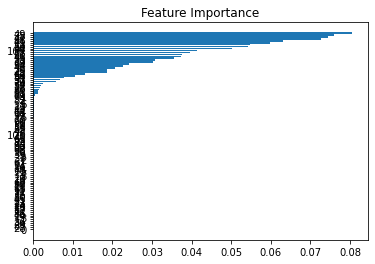

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# We want to plot the feature importance of all features to see how our classifier is splitting data
importances = model.feature_importances_
indices = np.argsort(importances)

# names = [magicFunctionThatGivesNames() for i in indices]

# Barplot
plt.barh(range(len(indices)), importances[indices])
# Add feature names as y-axis labels
# replace [indices[i] for i in indices] with feature labels
plt.yticks(range(len(indices)), [indices[i] for i in indices])
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

[Text(246.17647058823528, 578.8333333333334, 'X[9] <= 0.427\ngini = 0.798\nsamples = 72\nvalue = [23, 20, 23, 26, 21]'),
 Text(109.41176470588235, 528.5, 'X[65] <= 0.034\ngini = 0.48\nsamples = 22\nvalue = [0, 12, 23, 1, 0]'),
 Text(72.94117647058823, 478.16666666666663, 'X[15] <= 0.277\ngini = 0.142\nsamples = 11\nvalue = [0, 12, 0, 1, 0]'),
 Text(36.470588235294116, 427.8333333333333, 'gini = 0.0\nsamples = 9\nvalue = [0, 10, 0, 0, 0]'),
 Text(109.41176470588235, 427.8333333333333, 'X[12] <= 0.058\ngini = 0.444\nsamples = 2\nvalue = [0, 2, 0, 1, 0]'),
 Text(72.94117647058823, 377.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0, 0, 0]'),
 Text(145.88235294117646, 377.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(145.88235294117646, 478.16666666666663, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 23, 0, 0]'),
 Text(382.94117647058823, 528.5, 'X[89] <= 0.762\ngini = 0.72\nsamples = 50\nvalue = [23, 8, 0, 25, 21]'),
 Text(291.7647058823529, 478.16666666666663, 'X[52] <= 0.046\

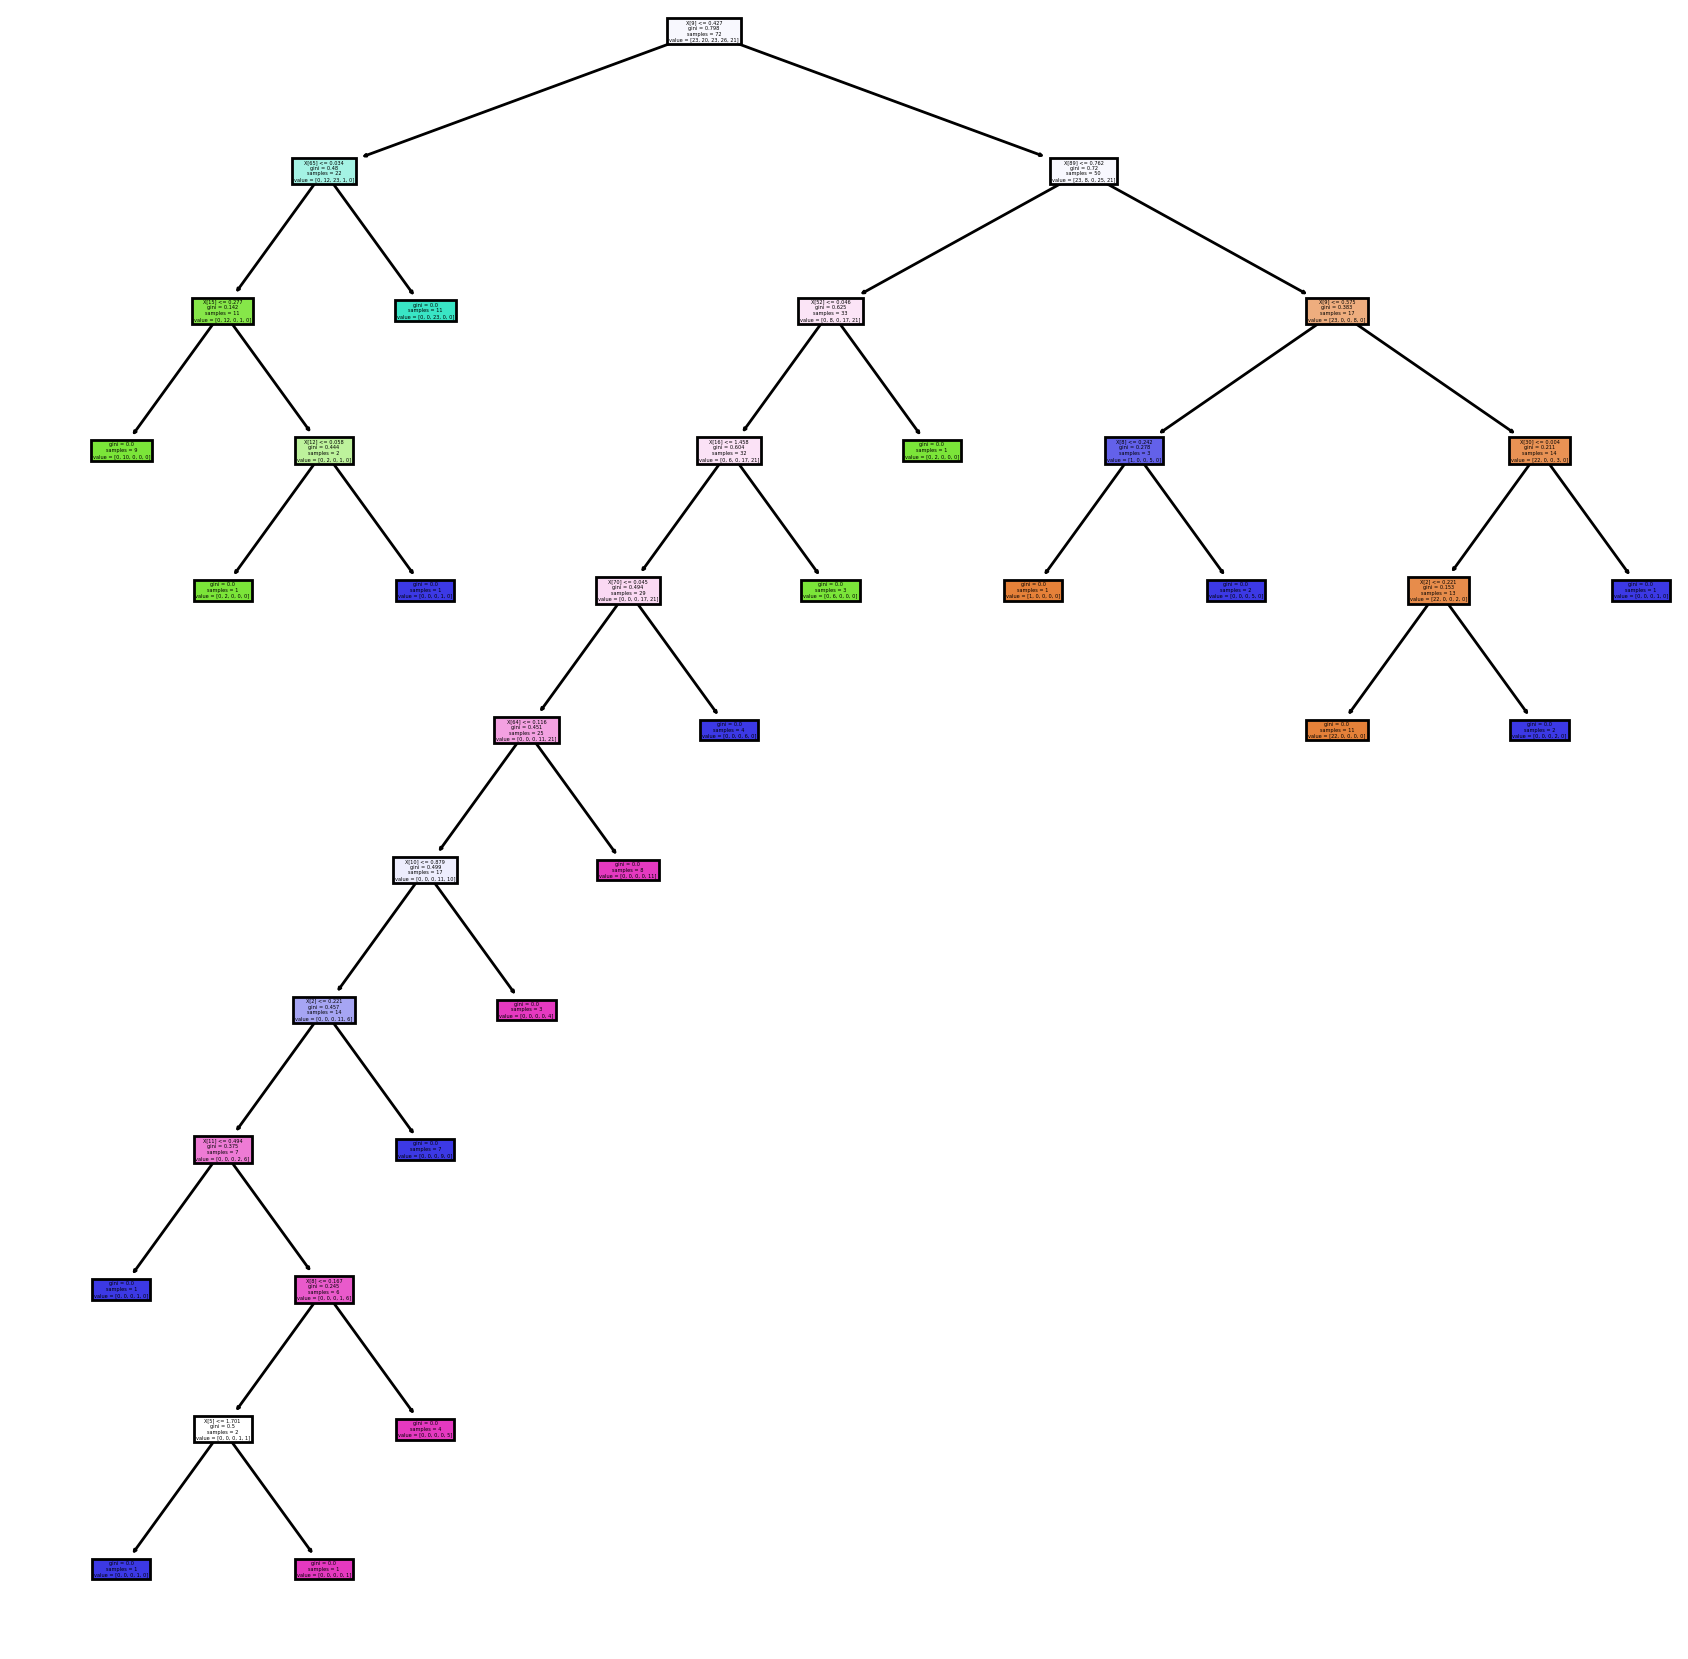

In [ ]:
from sklearn import tree

# Plot one tree in our forest for fun
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(rfc.estimators_[0], filled = True)